##Ciencia de Datos Machine Learning 

### Guido

#### 


In [313]:
!pip install tabulate

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer


In [2]:
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
data = pd.read_csv('accidentes_2223.csv')
df = pd.DataFrame(data)
df.head()


,id,gestion,genero,fecha_nac,empleador,fecha_acc,mortal,tipoacc,actividad
0,129934,2022,Masculino,1976-08-27 00:00:00,POLICIA BOLIVIANA,2021-11-10 00:00:00,No,Caídas de objetos,S. OTRAS ACTIVIDADES DE SERVICIOS
1,131693,2022,Femenino,1991-08-20 00:00:00,SERVICIO DEPARTAMENTAL DE SALUD SEDEGES CBBA,2021-12-30 00:00:00,No,Caídas de personas,Q. SERVICIOS DE SALUD Y DE ASISTENCIA SOCIAL
2,131694,2022,Masculino,1968-09-06 00:00:00,EMPRESA MINERA CARACOLES,2022-01-11 00:00:00,No,Caídas de personas,B. EXPLOTACIÓN DE MINAS Y CANTERAS
3,131695,2022,Masculino,1929-08-10 00:00:00,BANCO PRODEM S.A.,2021-12-31 00:00:00,No,Caídas de personas,S. OTRAS ACTIVIDADES DE SERVICIOS
4,131696,2022,Masculino,1990-11-29 00:00:00,JORGE RIOS VALENZUELA,2022-01-11 00:00:00,No,"Otras formas de accidente, no clasificadas baj...",S. OTRAS ACTIVIDADES DE SERVICIOS


In [63]:
df.sample(10)

,id,gestion,genero,fecha_nac,empleador,fecha_acc,mortal,tipoacc,actividad
12869,173661,2023,Masculino,1978-09-08 00:00:00,LABORATORIOS VITA S-A.,2023-02-01 00:00:00,No,"Otras formas de accidente, no clasificadas baj...",C. INDUSTRIA MANUFACTURERA
5992,165504,2022,Masculino,1975-08-03 00:00:00,INCERPAZ LTDA.,2022-09-02 00:00:00,No,Caídas de objetos,C. INDUSTRIA MANUFACTURERA
9871,170241,2022,Femenino,1967-08-28 00:00:00,BANCO UNION SA,2022-11-03 00:00:00,Fatal,"Pisadas sobre, choques contra, o golpes por ob...",K. INTERMEDIACIÓN FINANCIERA Y SEGUROS
3092,135236,2022,Masculino,1987-05-02 00:00:00,COOPERATIVA MINERA NUEVA SAN JOSE RL,2022-01-24 00:00:00,No,Caídas de personas,B. EXPLOTACIÓN DE MINAS Y CANTERAS
5581,164972,2022,Masculino,1999-01-28 00:00:00,BANCO FASSIL,2022-02-11 00:00:00,No,"Pisadas sobre, choques contra, o golpes por ob...",K. INTERMEDIACIÓN FINANCIERA Y SEGUROS
9912,170286,2022,Masculino,1989-05-26 00:00:00,UNIDAD OPERATIVA DE ALUMBRADO PUBLICO,2022-06-18 00:00:00,No,Caídas de personas,"D. SUMINISTRO DE ELECTRICIDAD, GAS, VAPOR Y AI..."
12809,173585,2023,Femenino,1978-10-26 00:00:00,CAJA NACIONAL DE SALUD,2023-02-04 00:00:00,No,Caídas de personas,Q. SERVICIOS DE SALUD Y DE ASISTENCIA SOCIAL
11529,172171,2022,Masculino,1993-11-28 00:00:00,PROLIMPIO SRL,2022-07-05 00:00:00,No,Caídas de personas,T. ACTIVIDADES DE HOGARES PRIVADOS COMO EMPLEA...
4786,164026,2022,Masculino,1993-04-15 00:00:00,EMPRESA MINERA COLQUIRI COMIBOL,2022-07-07 00:00:00,No,Esfuerzos excesivos o falsos movimientos,B. EXPLOTACIÓN DE MINAS Y CANTERAS
6751,166411,2022,Masculino,1997-01-26 00:00:00,POLICÍA BOLIVIANA,2022-09-15 00:00:00,No,Caídas de personas,"O. ADMINISTRACIÓN PÚBLICA, DEFENSA Y PLANES DE..."


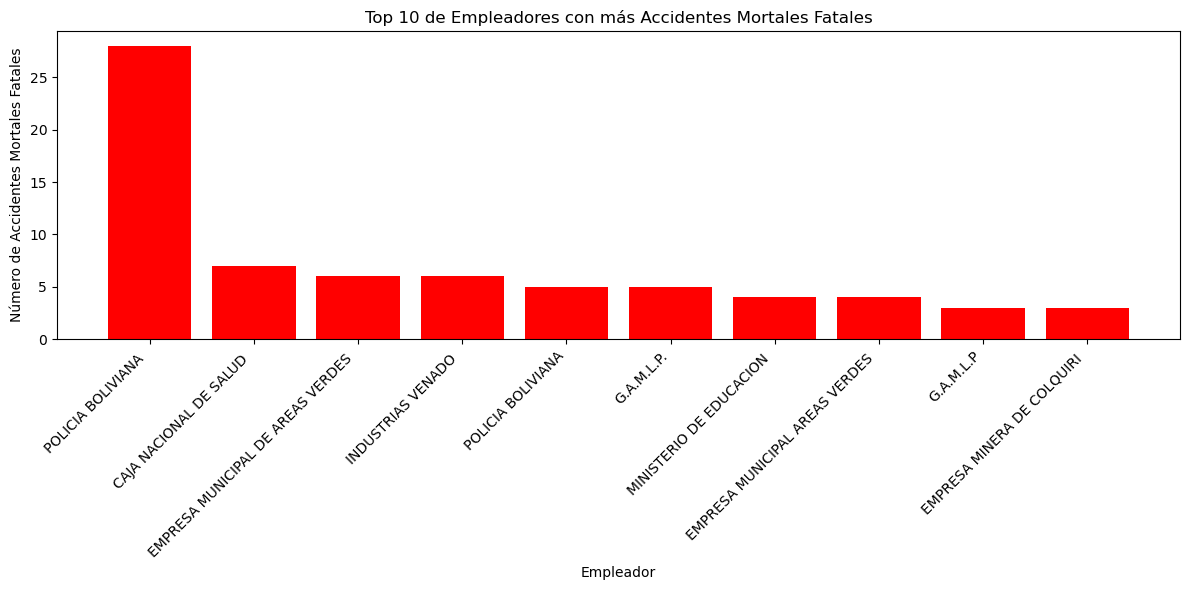

In [67]:
import matplotlib.pyplot as plt

# Configuración del gráfico
plt.figure(figsize=(12, 6))
plt.bar(top_10_fatal_employers['empleador'], top_10_fatal_employers['count'], color='red')
plt.title('Top 10 de Empleadores con más Accidentes Mortales Fatales')
plt.xlabel('Empleador')
plt.ylabel('Número de Accidentes Mortales Fatales')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor legibilidad

# Mostrar el gráfico
plt.tight_layout()
plt.show()


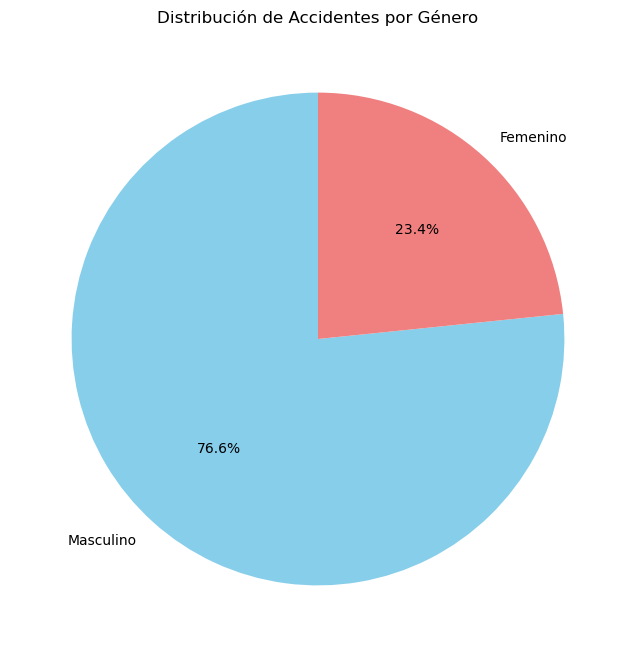

In [5]:
# Calcular porcentajes por género
porcentajes = df['genero'].value_counts(normalize=True) * 100

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(porcentajes, labels=porcentajes.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribución de Accidentes por Género')
plt.show()

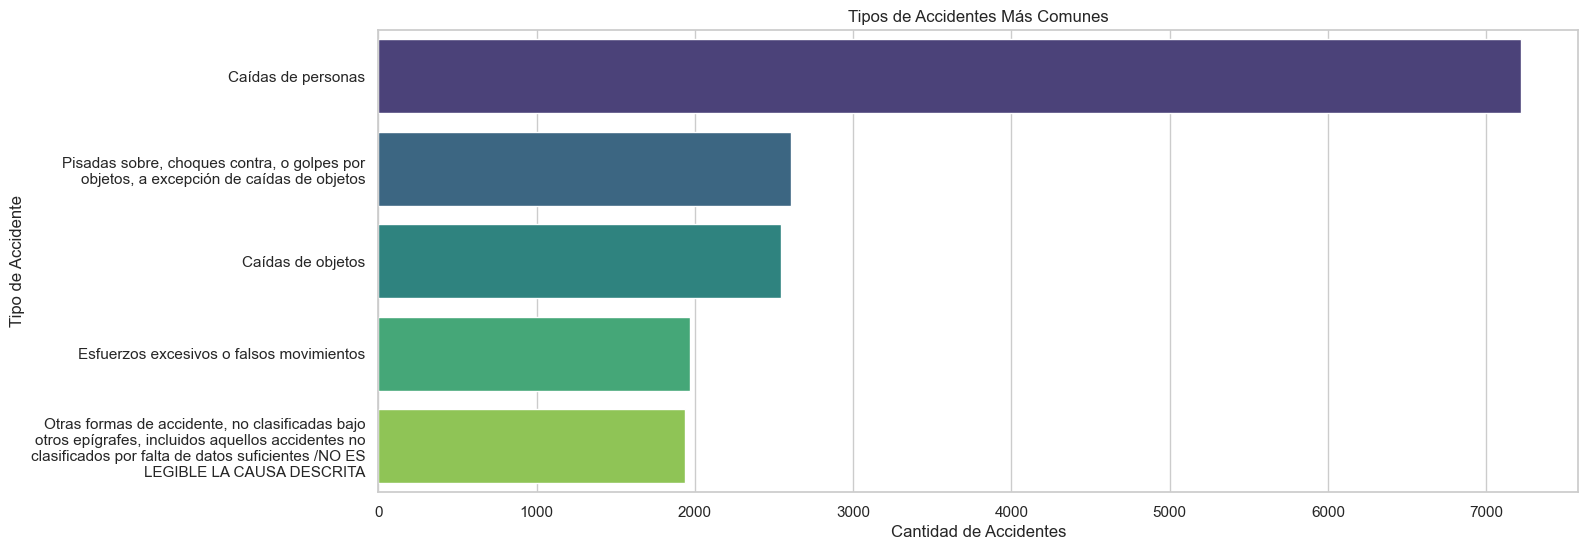

In [403]:
import textwrap
# Obtener los tipos de accidentes más comunes
tiposacc_mas_comunes = df['tipoacc'].value_counts().index[:5]  # Cambia 5 por el número deseado de tipos más comunes

# Filtrar el DataFrame para obtener solo los tipos de accidentes más comunes
df_tiposacc_mas_comunes = df[df['tipoacc'].isin(tiposacc_mas_comunes)]

# Crear un gráfico de barras horizontales con Seaborn
plt.figure(figsize=(15,6))
sns.countplot(y='tipoacc', data=df_tiposacc_mas_comunes, palette='viridis', order=df_tiposacc_mas_comunes['tipoacc'].value_counts().index)

# Ajustar la posición de la leyenda y agregar espacio en el lado izquierdo
plt.subplots_adjust(left=0.1)

# Dividir etiquetas largas en varias líneas
wraps = [textwrap.fill(label, width=50) for label in df_tiposacc_mas_comunes['tipoacc'].value_counts().index]
plt.yticks(range(len(wraps)), wraps)

plt.title('Tipos de Accidentes Más Comunes')
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Tipo de Accidente')
plt.show()

In [6]:
# Calcular la cantidad de datos en cada gestión
cantidad_por_gestion = df['gestion'].value_counts().reset_index()
cantidad_por_gestion.columns = ['Gestión', 'Cantidad de Datos']

# Formatear y mostrar la tabla
tabla_resultados = tabulate(cantidad_por_gestion, headers='keys', tablefmt='pretty', showindex=False)
print(tabla_resultados)
print(cantidad_por_gestion)

+---------+-------------------+
| Gestión | Cantidad de Datos |
+---------+-------------------+
|  2022   |       11875       |
|  2023   |       6597        |
+---------+-------------------+
   Gestión  Cantidad de Datos
0     2022              11875
1     2023               6597


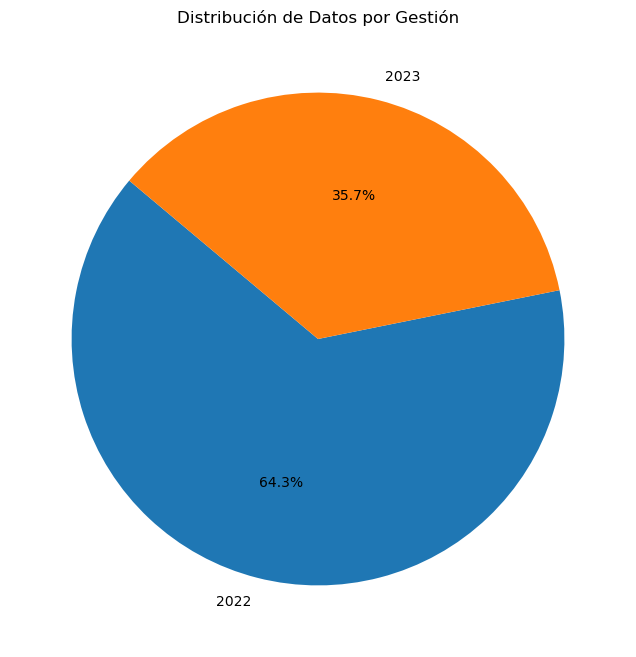

In [318]:
# Calcular la cantidad de datos en cada gestión
cantidad_por_gestion = df['gestion'].value_counts().reset_index()
cantidad_por_gestion.columns = ['Gestión', 'Cantidad de Datos']

# Calcular porcentajes
cantidad_por_gestion['Porcentaje'] = (cantidad_por_gestion['Cantidad de Datos'] / len(df)) * 100

# Gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(cantidad_por_gestion['Porcentaje'], labels=cantidad_por_gestion['Gestión'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Datos por Gestión')
plt.show()

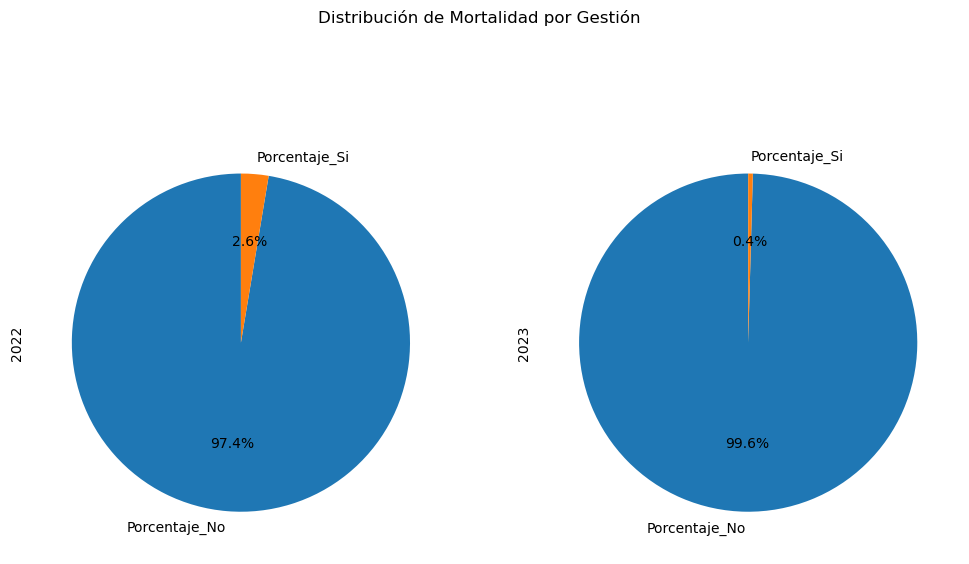

In [7]:
# Crear un DataFrame con la distribución de mortalidad por gestión
mortalidad_por_gestion = df.groupby(['gestion', 'mortal']).size().unstack(fill_value=0)
mortalidad_por_gestion['Total'] = mortalidad_por_gestion.sum(axis=1)
mortalidad_por_gestion['Porcentaje_No'] = (mortalidad_por_gestion['No'] / mortalidad_por_gestion['Total']) * 100

# Manejar el caso cuando 'Si' está presente en la columna 'mortal'
if 'Fatal' in mortalidad_por_gestion.columns:
    mortalidad_por_gestion['Porcentaje_Si'] = (mortalidad_por_gestion['Fatal'] / mortalidad_por_gestion['Total']) * 100

# Gráfico de pasteles
columnas_a_mostrar = ['Porcentaje_No'] + (['Porcentaje_Si'] if 'Fatal' in mortalidad_por_gestion.columns else [])
mortalidad_por_gestion[columnas_a_mostrar].T.plot.pie(subplots=True, autopct='%1.1f%%', startangle=90, figsize=(12, 6), legend=False)
plt.suptitle('Distribución de Mortalidad por Gestión', y=1.05)
plt.show()

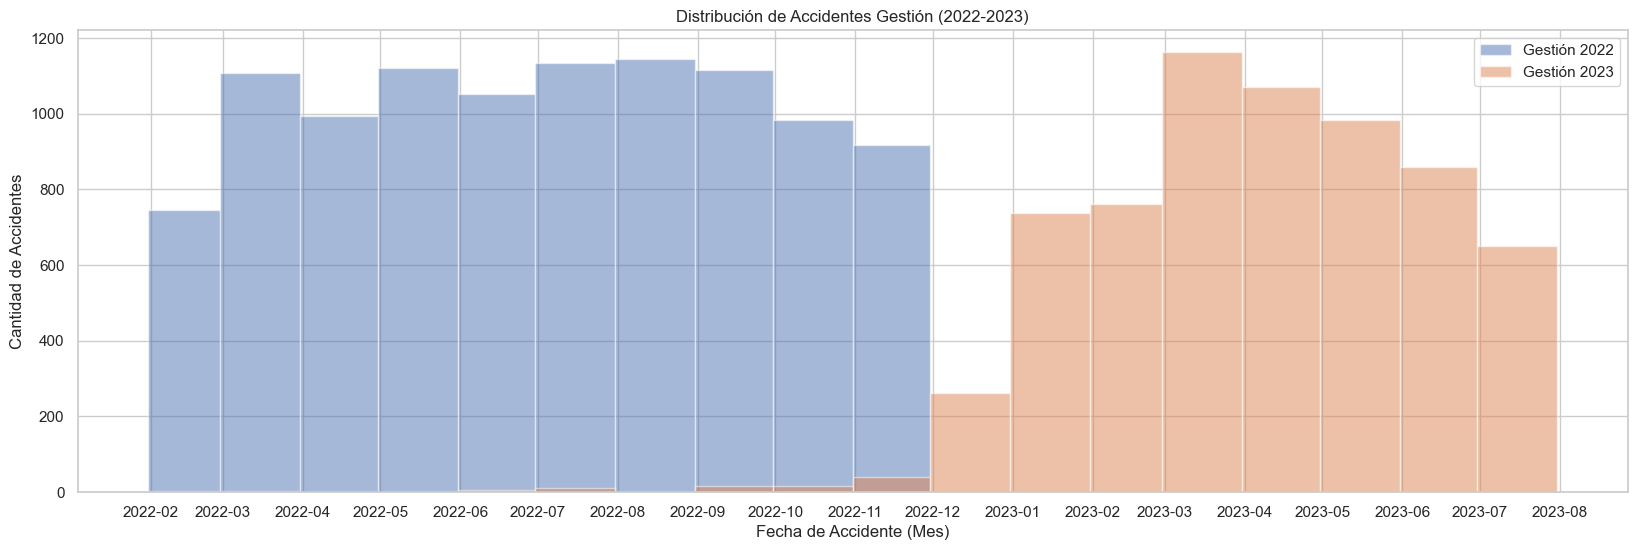

In [355]:
# Convertir la columna 'fecha_acc' a tipo datetime
df['fecha_acc'] = pd.to_datetime(df['fecha_acc'])

# Filtrar por los años 2021, 2022 y 2023
df_filtrado = df[df['fecha_acc'].dt.year.isin([2022, 2023])]

# Configurar el tamaño del gráfico
plt.figure(figsize=(20, 6))

# Iterar sobre cada gestión y dibujar un histograma para las fechas de accidentes
for gestion, subset in df_filtrado.groupby('gestion'):
    plt.hist(subset['fecha_acc'], bins=pd.date_range(start=subset['fecha_acc'].min(), end=subset['fecha_acc'].max(), freq='M'), alpha=0.5, label=f'Gestión {gestion}')

# Configurar el formato de fecha en el eje x
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())

plt.xlabel('Fecha de Accidente (Mes)')
plt.ylabel('Cantidad de Accidentes')
plt.title('Distribución de Accidentes Gestión (2022-2023)')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


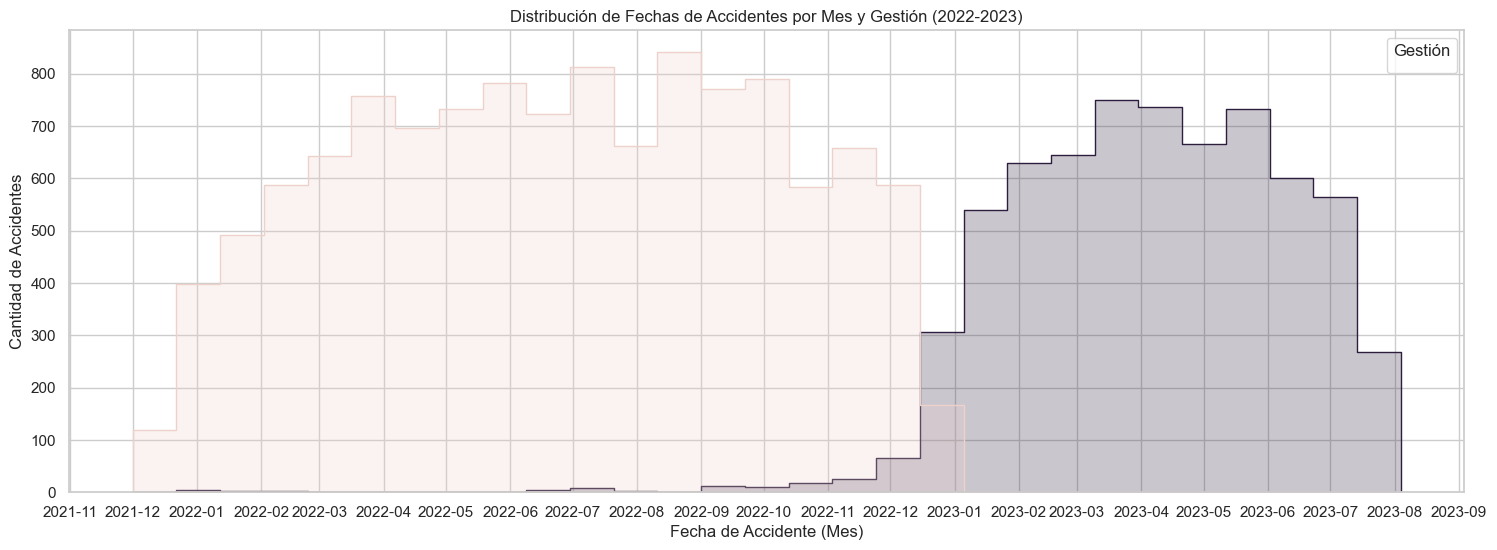

In [362]:
df['fecha_acc'] = pd.to_datetime(df['fecha_acc'])

# Filtrar por los años 2021, 2022 y 2023 y desde junio de 2021
df_filtrado = df[(df['fecha_acc'].dt.year.isin([2021, 2022, 2023])) & (df['fecha_acc'] >= '2021-12-01')]

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Configurar el tamaño del gráfico
plt.figure(figsize=(18, 6))

# Crear el gráfico de distribución de fechas de accidentes con Seaborn
sns.histplot(data=df_filtrado, x='fecha_acc', hue='gestion', element="step", stat="count", common_norm=False, kde=False)

# Configurar el formato de fecha en el eje x
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())

plt.xlabel('Fecha de Accidente (Mes)')
plt.ylabel('Cantidad de Accidentes')
plt.title('Distribución de Fechas de Accidentes por Mes y Gestión (2022-2023)')
plt.legend(title='Gestión')
plt.show()

In [8]:

# Preprocesar los datos
df["fecha_nac"] = pd.to_datetime(df["fecha_nac"], errors='coerce')
df['fecha_acc'] = pd.to_datetime(df['fecha_acc'])


# Establecer un rango de fechas de nacimiento válido
min_birth_date = pd.to_datetime('1900-01-01')
max_birth_date = pd.to_datetime('2023-12-31')

# Ajustar fechas de nacimiento fuera del rango
df.loc[df["fecha_nac"] < min_birth_date, "fecha_nac"] = min_birth_date
df.loc[df["fecha_nac"] > max_birth_date, "fecha_nac"] = max_birth_date

# Convertir la fecha de nacimiento a la edad
df["edad"] = (pd.to_datetime("now") - df["fecha_nac"]).astype('<m8[Y]')


C:\Users\Maribel\AppData\Local\Temp\ipykernel_15440\1687948797.py:15: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df["edad"] = (pd.to_datetime("now") - df["fecha_nac"]).astype('<m8[Y]')


In [9]:
print(df)

           id  gestion     genero  fecha_nac  \
0      129934     2022  Masculino 1976-08-27   
1      131693     2022   Femenino 1991-08-20   
2      131694     2022  Masculino 1968-09-06   
3      131695     2022  Masculino 1929-08-10   
4      131696     2022  Masculino 1990-11-29   
...       ...      ...        ...        ...   
18467  180124     2023   Femenino 1960-01-04   
18468  180125     2023  Masculino 1987-07-01   
18469  180126     2023  Masculino 1974-01-05   
18470  180129     2023  Masculino 1992-12-07   
18471  180133     2023  Masculino 1990-09-30   

                                          empleador  fecha_acc mortal  \
0                                 POLICIA BOLIVIANA 2021-11-10     No   
1      SERVICIO DEPARTAMENTAL DE SALUD SEDEGES CBBA 2021-12-30     No   
2                         EMPRESA MINERA CARACOLES  2022-01-11     No   
3                                BANCO PRODEM S.A.  2021-12-31     No   
4                            JORGE RIOS VALENZUELA  2022-0

In [10]:
columns_needed = ["id", "gestion", "genero", "fecha_acc", "mortal", "tipoacc", "edad"]
df = df[columns_needed]

In [11]:
df.head()

,id,gestion,genero,fecha_acc,mortal,tipoacc,edad
0,129934,2022,Masculino,2021-11-10,No,Caídas de objetos,47.0
1,131693,2022,Femenino,2021-12-30,No,Caídas de personas,32.0
2,131694,2022,Masculino,2022-01-11,No,Caídas de personas,55.0
3,131695,2022,Masculino,2021-12-31,No,Caídas de personas,94.0
4,131696,2022,Masculino,2022-01-11,No,"Otras formas de accidente, no clasificadas baj...",33.0


In [12]:
# Codificar variables categóricas
df = pd.get_dummies(df, columns=['genero', 'tipoacc', 'mortal'])


In [13]:
df.head()

,id,gestion,fecha_acc,edad,genero_Femenino,genero_Masculino,tipoacc_Atrapada por un objeto o entre objetos,tipoacc_Caídas de objetos,tipoacc_Caídas de personas,tipoacc_Esfuerzos excesivos o falsos movimientos,"tipoacc_Exposición a, o contacto con, la corriente eléctrica","tipoacc_Exposición a, o contacto con, sustancias nocivas o radiaciones","tipoacc_Exposición a, o contacto con, temperaturas extremas","tipoacc_Otras formas de accidente, no clasificadas bajo otros epígrafes, incluidos aquellos accidentes no clasificados por falta de datos suficientes /NO ES LEGIBLE LA CAUSA DESCRITA","tipoacc_Pisadas sobre, choques contra, o golpes por objetos, a excepción de caídas de objetos",mortal_Fatal,mortal_No
0,129934,2022,2021-11-10,47.0,0,1,0,1,0,0,0,0,0,0,0,0,1
1,131693,2022,2021-12-30,32.0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,131694,2022,2022-01-11,55.0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,131695,2022,2021-12-31,94.0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,131696,2022,2022-01-11,33.0,0,1,0,0,0,0,0,0,0,1,0,0,1


In [14]:
# Seleccionar características y etiquetas
features = df.drop(['id', 'gestion', 'fecha_acc', 'mortal_No', 'mortal_Fatal'], axis=1)
labels = df[['mortal_No', 'mortal_Fatal']]



In [15]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [16]:
df.head()

,id,gestion,fecha_acc,edad,genero_Femenino,genero_Masculino,tipoacc_Atrapada por un objeto o entre objetos,tipoacc_Caídas de objetos,tipoacc_Caídas de personas,tipoacc_Esfuerzos excesivos o falsos movimientos,"tipoacc_Exposición a, o contacto con, la corriente eléctrica","tipoacc_Exposición a, o contacto con, sustancias nocivas o radiaciones","tipoacc_Exposición a, o contacto con, temperaturas extremas","tipoacc_Otras formas de accidente, no clasificadas bajo otros epígrafes, incluidos aquellos accidentes no clasificados por falta de datos suficientes /NO ES LEGIBLE LA CAUSA DESCRITA","tipoacc_Pisadas sobre, choques contra, o golpes por objetos, a excepción de caídas de objetos",mortal_Fatal,mortal_No
0,129934,2022,2021-11-10,47.0,0,1,0,1,0,0,0,0,0,0,0,0,1
1,131693,2022,2021-12-30,32.0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,131694,2022,2022-01-11,55.0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,131695,2022,2021-12-31,94.0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,131696,2022,2022-01-11,33.0,0,1,0,0,0,0,0,0,0,1,0,0,1


In [17]:
# Imputar valores faltantes en X_train
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Construir y entrenar un modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_imputed, y_train)


RandomForestClassifier(random_state=42)

In [18]:
# Imputar valores faltantes en X_test
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_imputed)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", report)

Accuracy: 0.9829499323410014

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3633
           1       0.00      0.00      0.00        62

   micro avg       0.98      0.98      0.98      3695
   macro avg       0.49      0.50      0.50      3695
weighted avg       0.97      0.98      0.97      3695
 samples avg       0.98      0.98      0.98      3695



In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [20]:
# Imputar valores faltantes en features
imputer = SimpleImputer(strategy='mean')
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

# Aplicar SMOTE para generar datos sintéticos
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(features_imputed, labels['mortal_Fatal'])


In [21]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [22]:
# Construir y entrenar un modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      3631
           1       0.89      0.88      0.89      3622

    accuracy                           0.89      7253
   macro avg       0.89      0.89      0.89      7253
weighted avg       0.89      0.89      0.89      7253



In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Construir y entrenar un modelo de Árbol de Decisión
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Evaluar el modelo de Árbol de Decisión
y_pred_decision_tree = decision_tree_model.predict(X_test)
print(classification_report(y_test, y_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      3631
           1       0.89      0.88      0.88      3622

    accuracy                           0.89      7253
   macro avg       0.89      0.89      0.89      7253
weighted avg       0.89      0.89      0.89      7253



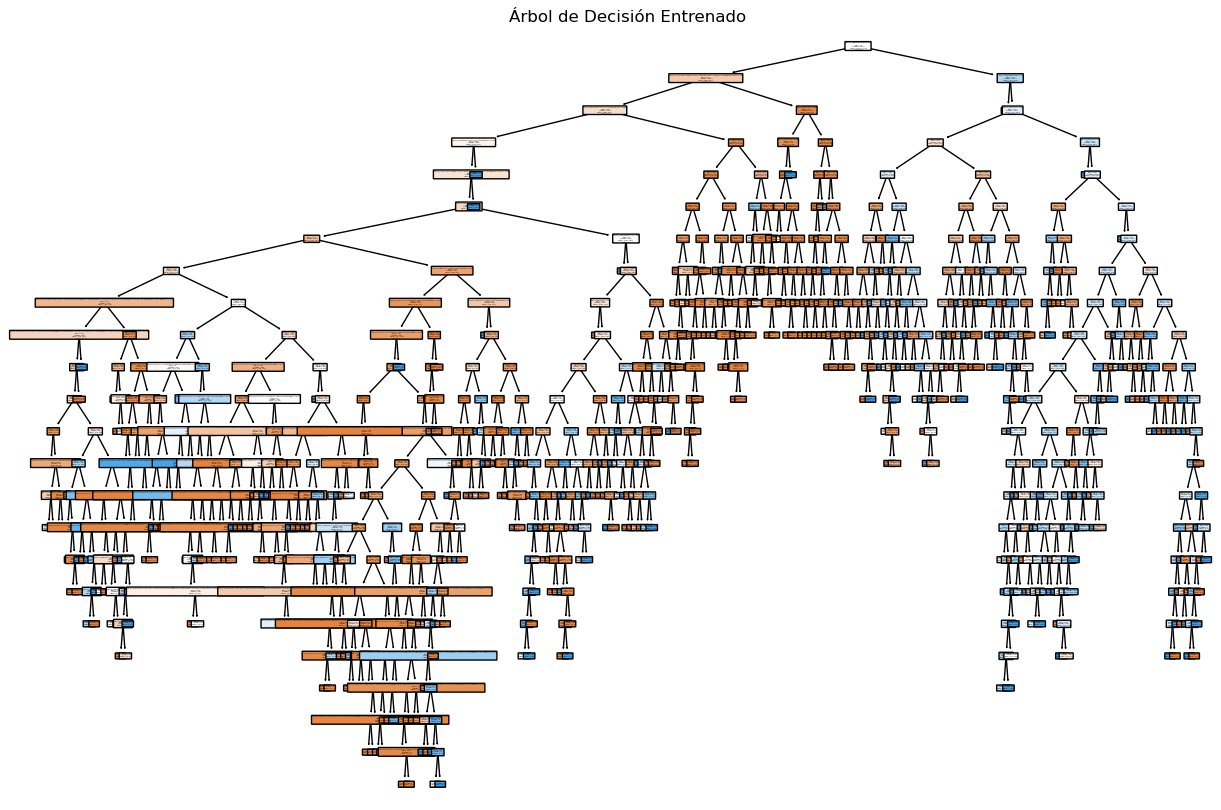

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualizar el árbol de decisión
plt.figure(figsize=(15, 10))
plot_tree(decision_tree_model, feature_names=X_train.columns, class_names=True, filled=True, rounded=True)
plt.title("Árbol de Decisión Entrenado")
plt.show()

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Crear y entrenar un modelo de Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [26]:
# Realizar predicciones en el conjunto de prueba
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

# Evaluar el rendimiento del modelo de Gradient Boosting
print("Rendimiento del modelo de Gradient Boosting:")
print(classification_report(y_test, y_pred_gradient_boosting))

Rendimiento del modelo de Gradient Boosting:
              precision    recall  f1-score   support

           0       0.81      0.76      0.79      3631
           1       0.78      0.82      0.80      3622

    accuracy                           0.79      7253
   macro avg       0.79      0.79      0.79      7253
weighted avg       0.79      0.79      0.79      7253



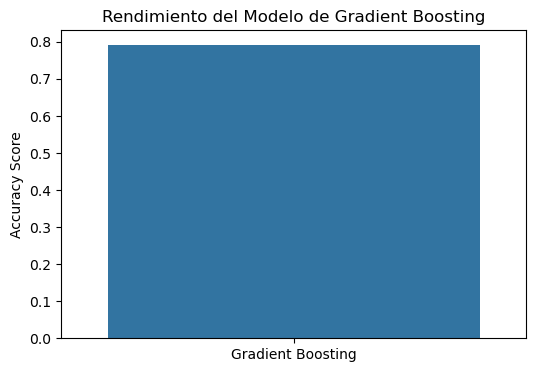

In [27]:
# Visualizar el rendimiento en un gráfico de barras
accuracy = accuracy_score(y_test, y_pred_gradient_boosting)
plt.figure(figsize=(6, 4))
sns.barplot(x=['Gradient Boosting'], y=[accuracy])
plt.title('Rendimiento del Modelo de Gradient Boosting')
plt.ylabel('Accuracy Score')
plt.show()

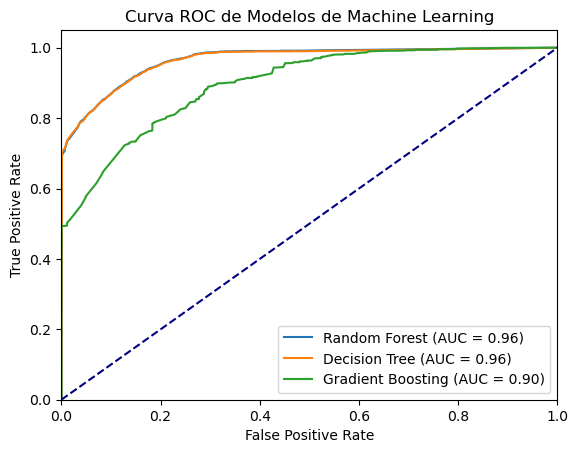

AUC Score for Random Forest: 0.9646
AUC Score for Decision Tree: 0.9636
AUC Score for Gradient Boosting: 0.8964


In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Asumiendo que ya tienes X_train, y_train, X_test, y_test

# Imputar valores faltantes en X_train
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Construir y entrenar modelos
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Entrenar y evaluar cada modelo
roc_auc_scores = {}

for name, model in models.items():
    model.fit(X_train_imputed, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores[name] = roc_auc
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Configurar el gráfico ROC
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC de Modelos de Machine Learning')
plt.legend(loc="lower right")
plt.show()

# Mostrar AUC Scores
for name, score in roc_auc_scores.items():
    print(f'AUC Score for {name}: {score:.4f}')


In [52]:
# Seleccionar algunos ejemplos aleatorios del conjunto de prueba
sample_indices = np.random.choice(X_test.index, size=5, replace=False)
sample_X = X_test.loc[sample_indices]
sample_y_true = y_test.loc[sample_indices]

In [53]:
import numpy as np
# Obtener las probabilidades predichas
sample_y_pred_proba = model.predict_proba(sample_X)[:, 1]

In [54]:
# Redondear las predicciones a etiquetas binarias
sample_y_pred = model.predict(sample_X)

# Mostrar resultados
result_df = pd.DataFrame({
    'True Label': sample_y_true,
    'Predicted Probability': sample_y_pred_proba,
    'Predicted Label': sample_y_pred
})
print(result_df)

       True Label  Predicted Probability  Predicted Label
35545           1               0.412892                0
9100            0               0.443283                0
21863           1               0.517833                1
7986            0               0.043386                0
16397           0               0.078729                0


In [45]:
df.head()

,id,gestion,fecha_acc,edad,genero_Femenino,genero_Masculino,tipoacc_Atrapada por un objeto o entre objetos,tipoacc_Caídas de objetos,tipoacc_Caídas de personas,tipoacc_Esfuerzos excesivos o falsos movimientos,"tipoacc_Exposición a, o contacto con, la corriente eléctrica","tipoacc_Exposición a, o contacto con, sustancias nocivas o radiaciones","tipoacc_Exposición a, o contacto con, temperaturas extremas","tipoacc_Otras formas de accidente, no clasificadas bajo otros epígrafes, incluidos aquellos accidentes no clasificados por falta de datos suficientes /NO ES LEGIBLE LA CAUSA DESCRITA","tipoacc_Pisadas sobre, choques contra, o golpes por objetos, a excepción de caídas de objetos",mortal_Fatal,mortal_No
0,129934,2022,2021-11-10,47.0,0,1,0,1,0,0,0,0,0,0,0,0,1
1,131693,2022,2021-12-30,32.0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,131694,2022,2022-01-11,55.0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,131695,2022,2021-12-31,94.0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,131696,2022,2022-01-11,33.0,0,1,0,0,0,0,0,0,0,1,0,0,1


In [57]:
# Usar posiciones en el índice directamente
selected_indices = [9100]

# Filtrar el conjunto de prueba original con los índices seleccionados
selected_examples = df.iloc[selected_indices]

# Mostrar los datos seleccionados
print(selected_examples)

          id  gestion  fecha_acc  edad  genero_Femenino  genero_Masculino  \
9100  169391     2022 2022-09-28  22.0                0                 1   

      tipoacc_Atrapada por un objeto o entre objetos  \
9100                                               0   

      tipoacc_Caídas de objetos  tipoacc_Caídas de personas  \
9100                          1                           0   

      tipoacc_Esfuerzos excesivos o falsos movimientos  \
9100                                                 0   

      tipoacc_Exposición a, o contacto con, la corriente eléctrica  \
9100                                                  0              

      tipoacc_Exposición a, o contacto con, sustancias nocivas o radiaciones  \
9100                                                  0                        

      tipoacc_Exposición a, o contacto con, temperaturas extremas  \
9100                                                  0             

      tipoacc_Otras formas de accidente, no cla

In [58]:
# Obtener la importancia de las características del modelo de Random Forest
feature_importances = best_model.feature_importances_

# Crear un DataFrame para mostrar las características y su importancia
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame con las características más importantes
print(feature_importance_df)

                                              Feature  Importance
0                                                edad    0.496117
5                          tipoacc_Caídas de personas    0.115208
11  tipoacc_Pisadas sobre, choques contra, o golpe...    0.085761
6    tipoacc_Esfuerzos excesivos o falsos movimientos    0.067867
10  tipoacc_Otras formas de accidente, no clasific...    0.064526
4                           tipoacc_Caídas de objetos    0.040733
2                                    genero_Masculino    0.033515
1                                     genero_Femenino    0.031936
9   tipoacc_Exposición a, o contacto con, temperat...    0.028592
3      tipoacc_Atrapada por un objeto o entre objetos    0.025868
8   tipoacc_Exposición a, o contacto con, sustanci...    0.006013
7   tipoacc_Exposición a, o contacto con, la corri...    0.003864


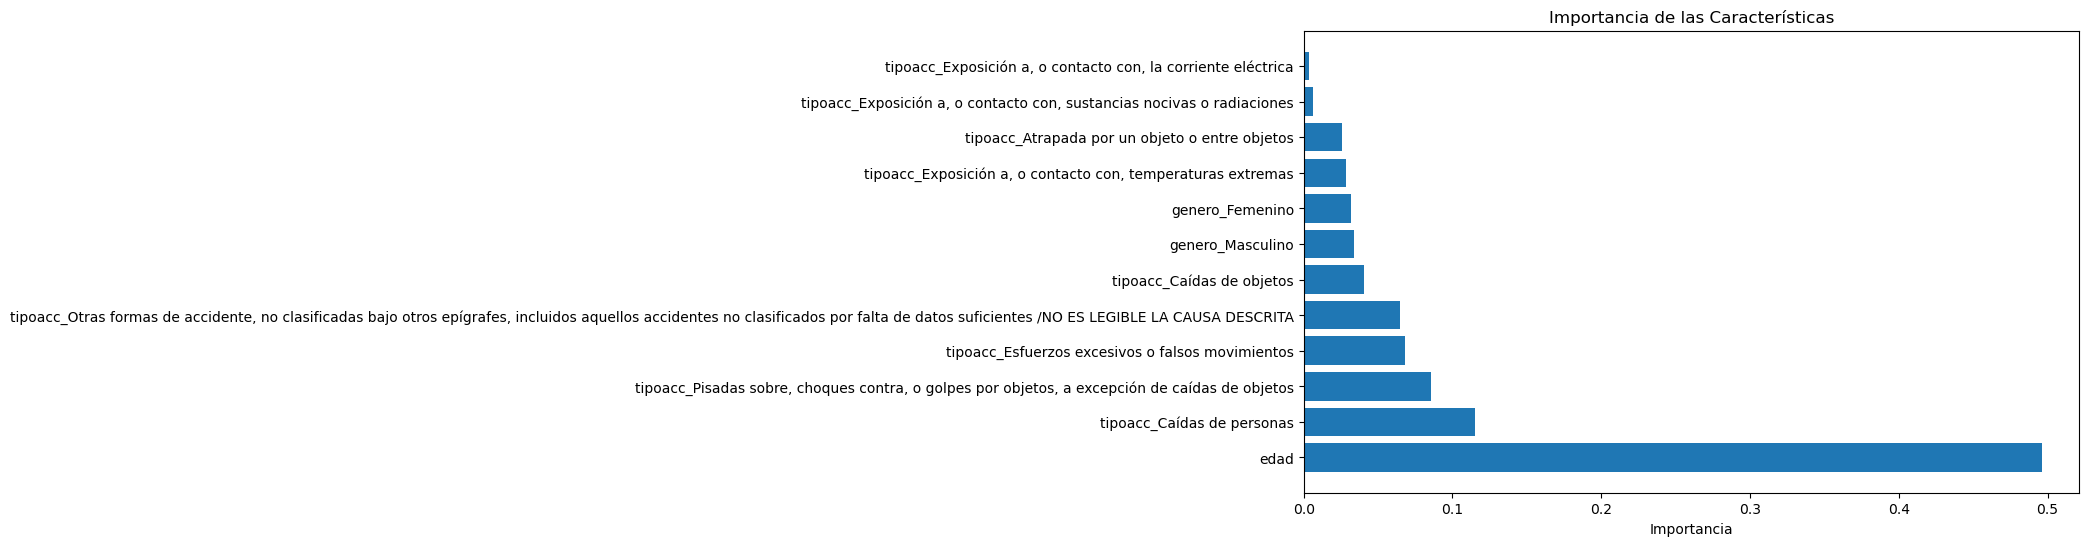

In [59]:
import matplotlib.pyplot as plt

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importancia')
plt.title('Importancia de las Características')
plt.show()

In [60]:
feature_importances = best_model.feature_importances_

# Crear un DataFrame para mostrar las características y su importancia
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Filtrar las características relacionadas con 'mortal_Fatal'
fatal_features = feature_importance_df[feature_importance_df['Feature'].str.contains('mortal_Fatal')]

# Mostrar el DataFrame con las características más importantes relacionadas con mortalidad fatal
print(fatal_features)

Empty DataFrame
Columns: [Feature, Importance]
Index: []
